## SPOTIFY ANALYSIS

This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.


*track_name*: Name of the song

*artist(s)_name*: Name of the artist(s) of the song

*artist_count*: Number of artists contributing to the song

*released_year*: Year when the song was released

*released_month*: Month when the song was released

*released_day*: Day of the month when the song was released

*in_spotify_playlists*: Number of Spotify playlists the song is included in

*in_spotify_charts*: Presence and rank of the song on Spotify charts

*streams*: Total number of streams on Spotify

*in_apple_playlists*: Number of Apple Music playlists the song is included in

*in_apple_charts*: Presence and rank of the song on Apple Music charts

*in_deezer_playlists*: Number of Deezer playlists the song is included in

*in_deezer_charts*: Presence and rank of the song on Deezer charts

*in_shazam_charts*: Presence and rank of the song on Shazam charts

*bpm*: Beats per minute, a measure of song tempo

*key*: Key of the song

*mode*: Mode of the song (major or minor)

*danceability_%*: Percentage indicating how suitable the song is for dancing

*valence_%*: Positivity of the song's musical content

*energy_%*: Perceived energy level of the song

*acousticness_%*: Amount of acoustic sound in the song

*instrumentalness_%*: Amount of instrumental content in the song

*liveness_%*: Presence of live performance elements

*speechiness_%*: Amount of spoken words in the song

In [184]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df_org=pd.read_csv("spt.csv",encoding= 'unicode-escape')

In [185]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [186]:
# Find the unique values in key

df2=df_org["key"]
df2.unique()

array(['B', 'C#', 'F', 'A', 'D', 'F#', nan, 'G#', 'G', 'E', 'A#', 'D#'],
      dtype=object)

**Cleaning Dataset**

In [187]:
# Checking if there are any duplicate rows

df_org.duplicated().sum()

0

In [188]:
# To find the total number of null values in a specific column

df_org['in_shazam_charts'].isnull().sum()

50

In [189]:
# Drop that column

df_org = df_org.drop('in_shazam_charts', axis=1)


In [190]:
# To find the total number of null values in a specific column

df_org['key'].isna().sum()

95

In [191]:
#Drop the key column due to high number of null values

df_org = df_org.drop('key', axis=1)


In [192]:
# in object type there will be comma values for writing an integer number greater than 999.

df_org['in_deezer_playlists'] = df_org['in_deezer_playlists'].str.replace(',', '', regex=True).astype('int64')


In [193]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [194]:
#Renaming the column name of artist

df_org = df_org.rename(columns={'artist(s)_name': 'artists'})

In [195]:
#Find the number of unique artist

unique_artists = df_org['artists'].unique()
len(unique_artists)

645

In [196]:
#Checking a particular track name

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,BPM110KeyAModeMajorDanceability53Valence75Ener...,16,...,0,110,Major,53,75,69,7,0,17,3


In [197]:
#change the stream value of particular song which is invalid

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)", 'streams'] = 211283228

In [198]:
#Checking if change has been applied

df_org.loc[df_org['track_name'] == "Love Grows (Where My Rosemary Goes)"]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,211283228,16,...,0,110,Major,53,75,69,7,0,17,3


In [199]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [200]:
#Change the datatype of stream from object to int

df_org['streams']=df_org['streams'].astype('int64')

In [201]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [202]:
#Checking unique tracks

unique_track = df_org['track_name'].unique()
unique_track.sort()
print(unique_track)

["'Till I Collapse" '(It Goes Like) Nanana - Edit'
 '10 Things I Hate About You' '10:35' '2 Be Loved (Am I Ready)' '2055'
 '212' '25k jacket (feat. Lil Baby)' '295' '505' '69'
 'A Holly Jolly Christmas - Single Version' 'A Tale By Quincy'
 'A Tu Merced' 'A Veces (feat. Feid)' 'ALIEN SUPERSTAR' 'AM Remix'
 'AMARGURA' 'AMERICA HAS A PROBLEM (feat. Kendrick Lamar)' 'AMG'
 'ANTIFRAGILE' 'Abcdario' 'About Damn Time' 'Acapulco' 'Acrï¿½ï¿½s'
 'Adore You' 'Afraid To Feel' 'After Dark' 'After Hours' 'After LIKE'
 'Agosto' 'Aguacero' 'Agudo Mï¿½ï¿½gi' 'Ai Preto' "Ain't Shit"
 'Ainï¿½ï¿½ï¿½t Tha' 'Alien Blues'
 'All For Us - from the HBO Original Series Euphoria'
 'All I Want for Christmas Is You' 'All My Life (feat. J. Cole)'
 'All Of The Girls You Loved Before'
 'All The Way Live (Spider-Man: Across the Spider-Verse) (Metro Boomin & Future, Lil Uzi Vert)'
 "All Too Well (10 Minute Version) (Taylor's Version) (From The Vault)"
 'All of Me' 'Alone' 'Am I Dreaming (Metro Boomin & A$AP Rocky, Roise

In [203]:
#Checking rows with special characters

rows_with_special_characters = df_org[df_org.astype(str).apply(lambda row: any(('ý' in cell or 'ï¿' in cell) for cell in row), axis=1)]

print("Rows with special character:")
rows_with_special_characters


Rows with special character:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
21,I Can See You (Taylorï¿½ï¿½ï¿½s Version) (From...,Taylor Swift,1,2023,7,7,516,38,52135248,73,...,1,123,Major,69,82,76,6,0,6,3
26,Calm Down (with Selena Gomez),"Rï¿½ï¿½ma, Selena G",2,2022,3,25,7112,77,899183384,202,...,38,107,Major,80,82,80,43,0,14,4
36,Frï¿½ï¿½gil (feat. Grupo Front,"Yahritza Y Su Esencia, Grupo Frontera",2,2023,4,7,672,34,188933502,19,...,9,150,Major,61,39,73,37,0,11,3
60,Tï¿½ï¿,"dennis, MC Kevin o Chris",2,2023,5,4,731,15,111947664,27,...,4,130,Major,86,59,96,50,1,9,5
63,BESO,"Rauw Alejandro, ROSALï¿½",2,2023,3,24,4053,50,357925728,82,...,12,95,Minor,77,53,64,74,0,17,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,ALIEN SUPERSTAR,Beyoncï¿,1,2022,7,29,2688,0,171788484,39,...,0,122,Minor,55,46,64,0,0,17,10
913,XQ Te Pones Asï¿,"Yandel, Feid",2,2022,9,13,308,0,47093942,6,...,0,92,Major,81,48,70,13,0,15,7
915,Sin Seï¿½ï,"Ovy On The Drums, Quevedo",2,2022,7,22,1097,2,209106362,18,...,1,118,Minor,82,75,85,33,1,11,4
918,THE LONELIEST,Mï¿½ï¿½ne,1,2022,10,7,1585,5,225093344,78,...,1,130,Major,52,24,60,0,0,8,3


In [204]:
#Changing the track name where there are special unreadable characters

characters_to_replace = ['ý', 'ï', '¿', 'Â', '½', 'Ã', '¯']

for char in characters_to_replace:
    df_org['track_name'] = df_org['track_name'].str.replace(char, '')

df_org.head(25)


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


In [205]:
#Checking rows where track_name is empty or NULL

null_track_name_rows = df_org[df_org['track_name'].isnull() | (df_org['track_name'] == '')]
print("Rows with NULL or empty track_name:")
null_track_name_rows

Rows with NULL or empty track_name:


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
174,,YOASOBI,1,2023,4,12,356,16,143573775,35,...,1,166,Major,57,84,94,11,0,37,9
374,,Fujii Kaze,1,2020,5,20,685,14,403097450,24,...,0,158,Minor,60,52,76,17,0,19,5


In [206]:
#Manually changing the track name

df_org.loc[374, 'track_name'] = 'Shinunoga E-Wa'
df_org.loc[374]

track_name              Shinunoga E-Wa
artists                     Fujii Kaze
artist_count                         1
released_year                     2020
released_month                       5
released_day                        20
in_spotify_playlists               685
in_spotify_charts                   14
streams                      403097450
in_apple_playlists                  24
in_apple_charts                     94
in_deezer_playlists                  9
in_deezer_charts                     0
bpm                                158
mode                             Minor
danceability_%                      60
valence_%                           52
energy_%                            76
acousticness_%                      17
instrumentalness_%                   0
liveness_%                          19
speechiness_%                        5
Name: 374, dtype: object

In [207]:
#Manually changing the track name

df_org.loc[174, 'track_name'] = 'Run Into The Night'
df_org.loc[174]

track_name              Run Into The Night
artists                            YOASOBI
artist_count                             1
released_year                         2023
released_month                           4
released_day                            12
in_spotify_playlists                   356
in_spotify_charts                       16
streams                          143573775
in_apple_playlists                      35
in_apple_charts                        102
in_deezer_playlists                      8
in_deezer_charts                         1
bpm                                    166
mode                                 Major
danceability_%                          57
valence_%                               84
energy_%                                94
acousticness_%                          11
instrumentalness_%                       0
liveness_%                              37
speechiness_%                            9
Name: 174, dtype: object

In [208]:
#Checking artists with special characters

for char in characters_to_replace:
    char_present = df_org['artists'].str.contains(char)
    values_with_char = df_org['artists'][char_present]
    if not values_with_char.empty:
        print(f"Values with '{char}' in artist_name column:")
        print(values_with_char)

Values with 'ï' in artist_name column:
26                                   Rï¿½ï¿½ma, Selena G
63                              Rauw Alejandro, ROSALï¿½
112                            Jasiel Nuï¿½ï¿½ez, Peso P
118               Sebastian Yatra, Manuel Turizo, Beï¿½ï
146                            Bomba Estï¿½ï¿½reo, Bad B
210                                Junior H, Eden Muï¿½ï
212                                 Semicenk, Doï¿½ï¿½u 
231                                             Beyoncï¿
236                             Kendrick Lamar, Beyoncï¿
249                                 Zï¿½ï¿½ Neto & Crist
258                                 Rich The Kid, Matuï¿
278                                             ROSALï¿½
294                            Jasiel Nuï¿½ï¿½ez, Peso P
303                                  Tiï¿½ï¿½sto, Tate M
309                                   Marï¿½ï¿½lia Mendo
375                             Wisin & Yandel, ROSALï¿½
380                                             R

In [209]:
#Replacing special characters in artist name with #

for char in characters_to_replace:
    df_org['artists'] = df_org['artists'].str.replace(char, '#')

df_org.head(30)

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023,3,16,3090,50,725980112,34,...,13,148,Minor,67,83,76,48,0,8,3
7,Columbia,Quevedo,1,2023,7,7,714,43,58149378,25,...,13,100,Major,67,26,71,37,0,11,4
8,fukumean,Gunna,1,2023,5,15,1096,83,95217315,60,...,11,130,Minor,85,22,62,12,0,28,9
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023,3,17,2953,44,553634067,49,...,13,170,Minor,81,56,48,21,0,8,33


In [210]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artists               953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    int64 
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    int64 
 12  in_deezer_charts      953 non-null    int64 
 13  bpm                   953 non-null    int64 
 14  mode                  953 non-null    object
 15  danceability_%        953 non-null    in

In [211]:
df_org.count()

track_name              953
artists                 953
artist_count            953
released_year           953
released_month          953
released_day            953
in_spotify_playlists    953
in_spotify_charts       953
streams                 953
in_apple_playlists      953
in_apple_charts         953
in_deezer_playlists     953
in_deezer_charts        953
bpm                     953
mode                    953
danceability_%          953
valence_%               953
energy_%                953
acousticness_%          953
instrumentalness_%      953
liveness_%              953
speechiness_%           953
dtype: int64

In [212]:
df_org


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [213]:
df_org['track_name'].count()

953

In [214]:
a=df_org.track_name.unique()
len(a)

943

In [215]:
df_org.loc[df_org['track_name'] == "Nobody Like U - From \"Turning Red\"", 'artists']="Jordan Fisher, Josh Levi, Finneas O'Connell, 4*TOWN, Topher Ngo, Grayson Vill"
df_org.loc[df_org['track_name'] == "Nobody Like U - From \"Turning Red\""]

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
759,"Nobody Like U - From ""Turning Red""","Jordan Fisher, Josh Levi, Finneas O'Connell, 4...",6,2022,2,25,918,0,120847157,34,...,0,105,Minor,91,73,72,13,0,9,15


**Dealing with Duplicate Elements**

In [216]:
#Find the duplicate from orginal data
duplicate = df_org[df_org.duplicated(['track_name', 'artists'], keep = 'first')]
duplicate

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
482,SPIT IN MY FACE!,ThxSoMch,1,2022,10,31,573,0,301869854,1,...,0,166,Major,70,57,57,9,20,11,7
616,Take My Breath,The Weeknd,1,2021,8,6,6392,0,432702334,174,...,0,121,Major,75,53,74,2,0,11,5
764,About Damn Time,Lizzo,1,2022,4,14,9021,0,723894473,242,...,21,109,Minor,84,72,74,10,0,34,7
873,SNAP,Rosa Linn,1,2022,3,19,1818,0,711366595,3,...,0,170,Major,56,52,64,11,0,45,7


In [217]:
#Drop duplicate elements from original data
df_org.drop_duplicates(subset=['track_name', 'artists'], keep='first', inplace=True)
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [218]:
#Resetting the index
df_org.reset_index(drop=True, inplace=True)
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [219]:
df_org.to_csv('sheet.csv')

In [220]:
df_copy = df_org.copy()
df_copy

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


At this stage, the pre-processing is complete. Now we move on to identifying outliers and other analysis.

**Identifying Outliers**

In [221]:
columns_to_drop = ['track_name', 'artists', 'mode']
out_check = df_copy.drop(columns=columns_to_drop)

columns = out_check.columns

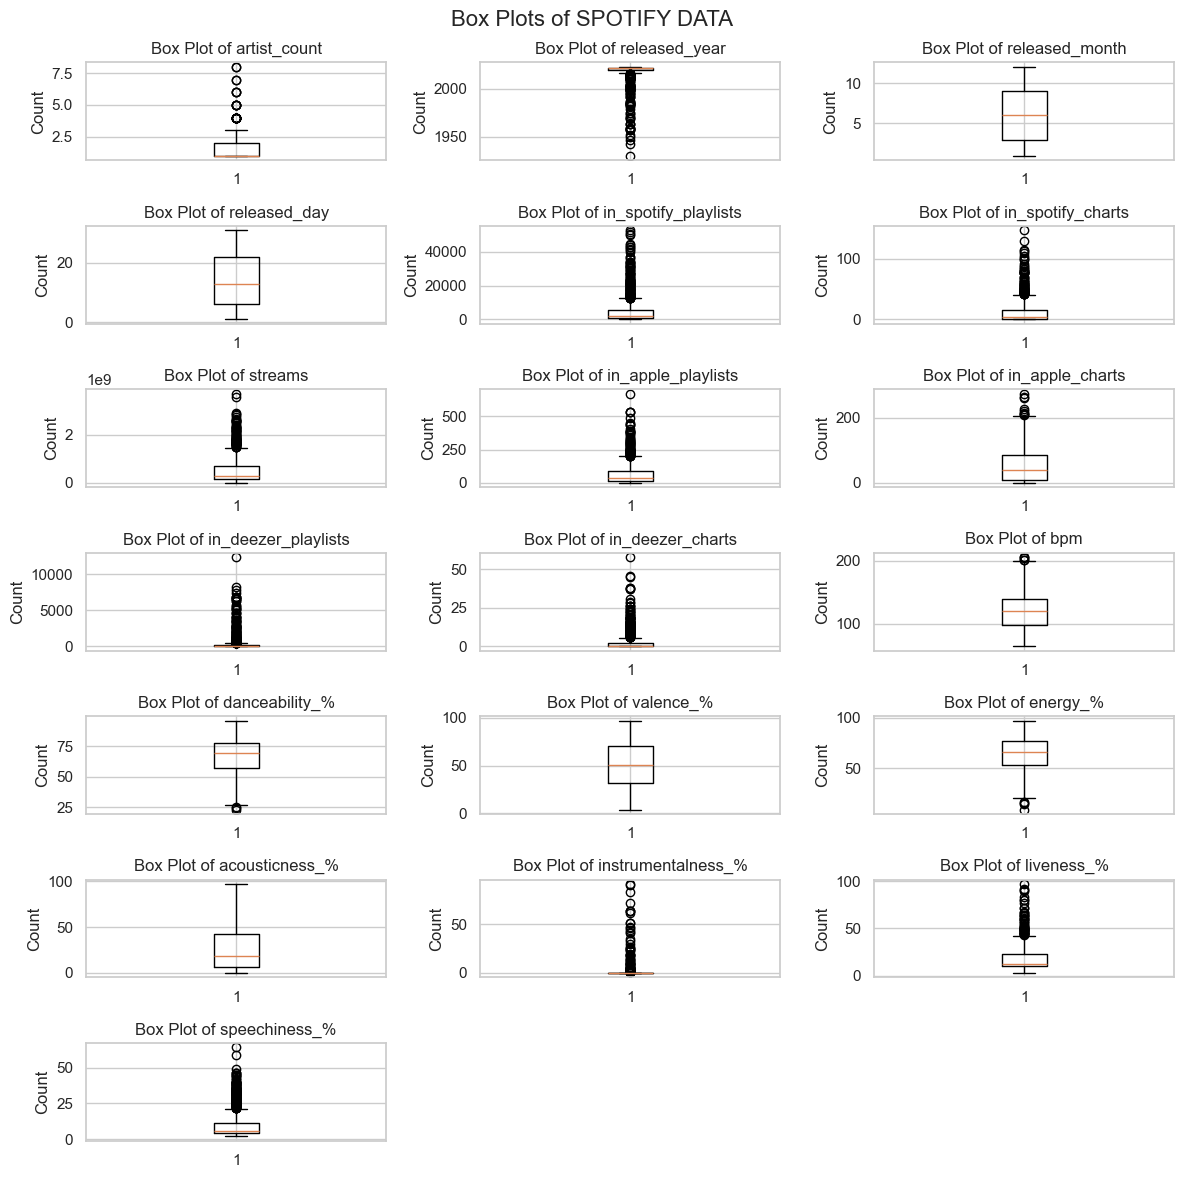

In [222]:
plt.figure(figsize=(12, 12))
plt.suptitle('Box Plots of SPOTIFY DATA', fontsize=16)

num_columns = len(columns)
num_rows = (num_columns // 3) + (num_columns % 3)  # Calculate the number of rows

for i, column in enumerate(columns, 1):
    plt.subplot(num_rows, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')


plt.tight_layout()
plt.show()

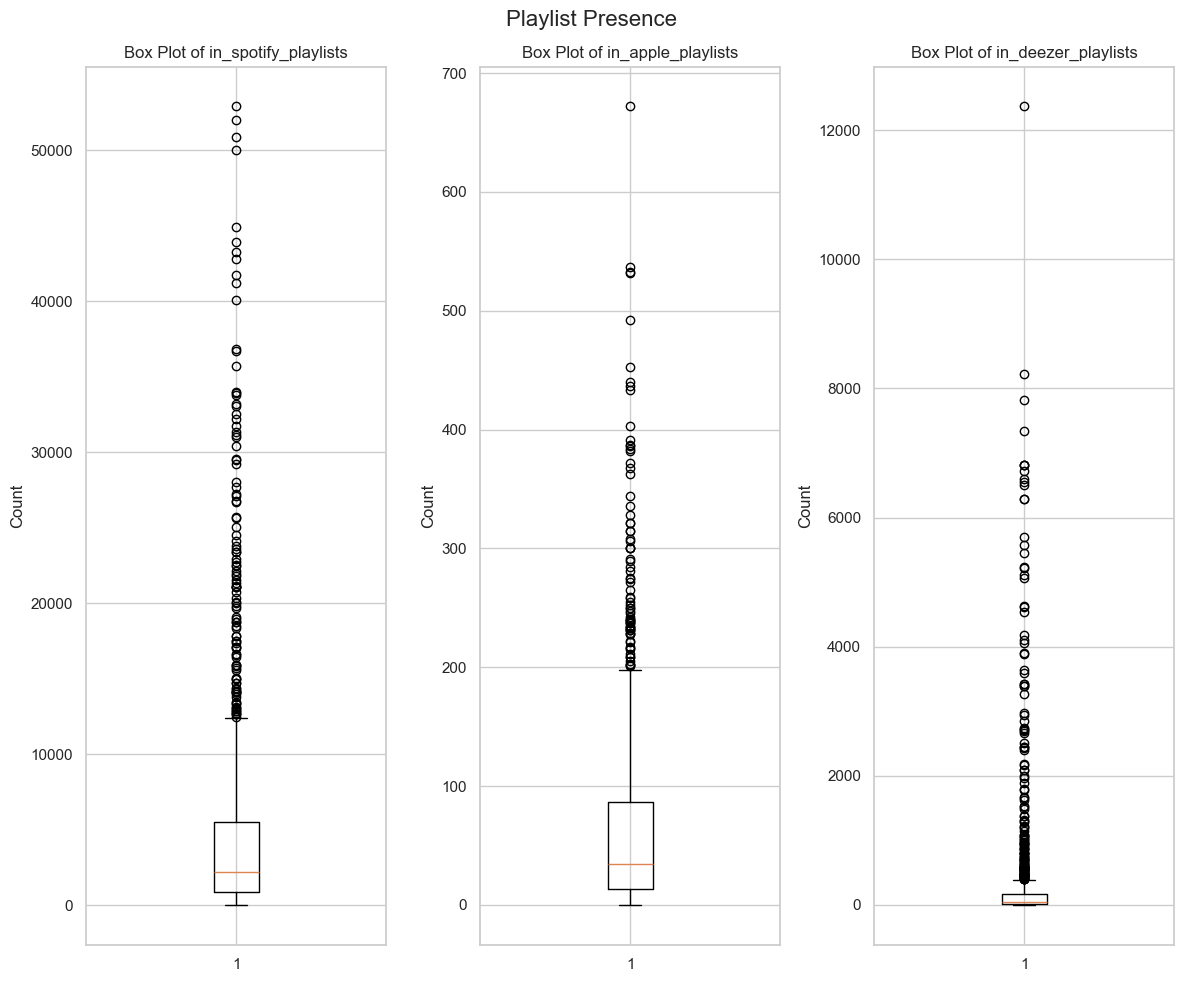

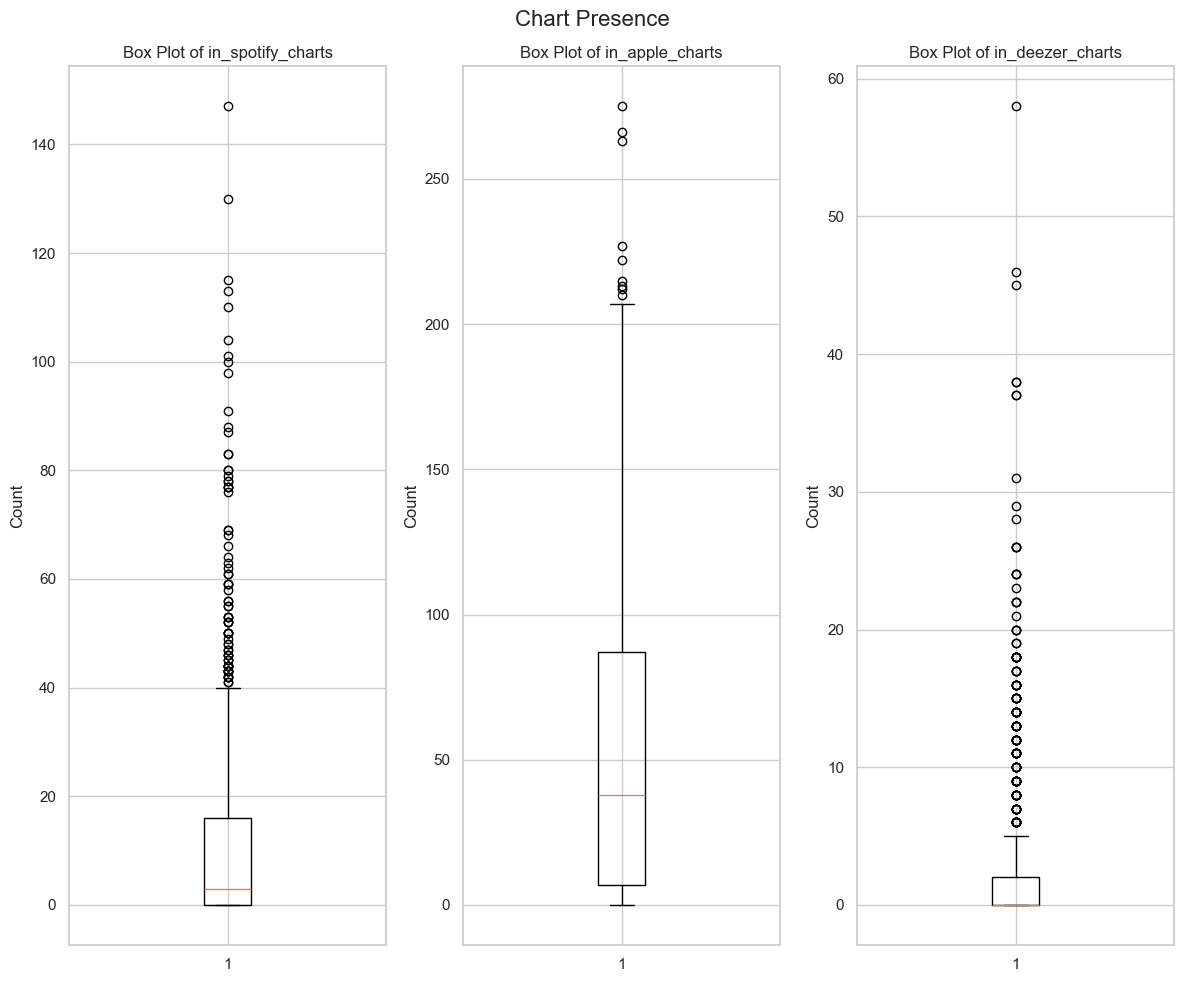

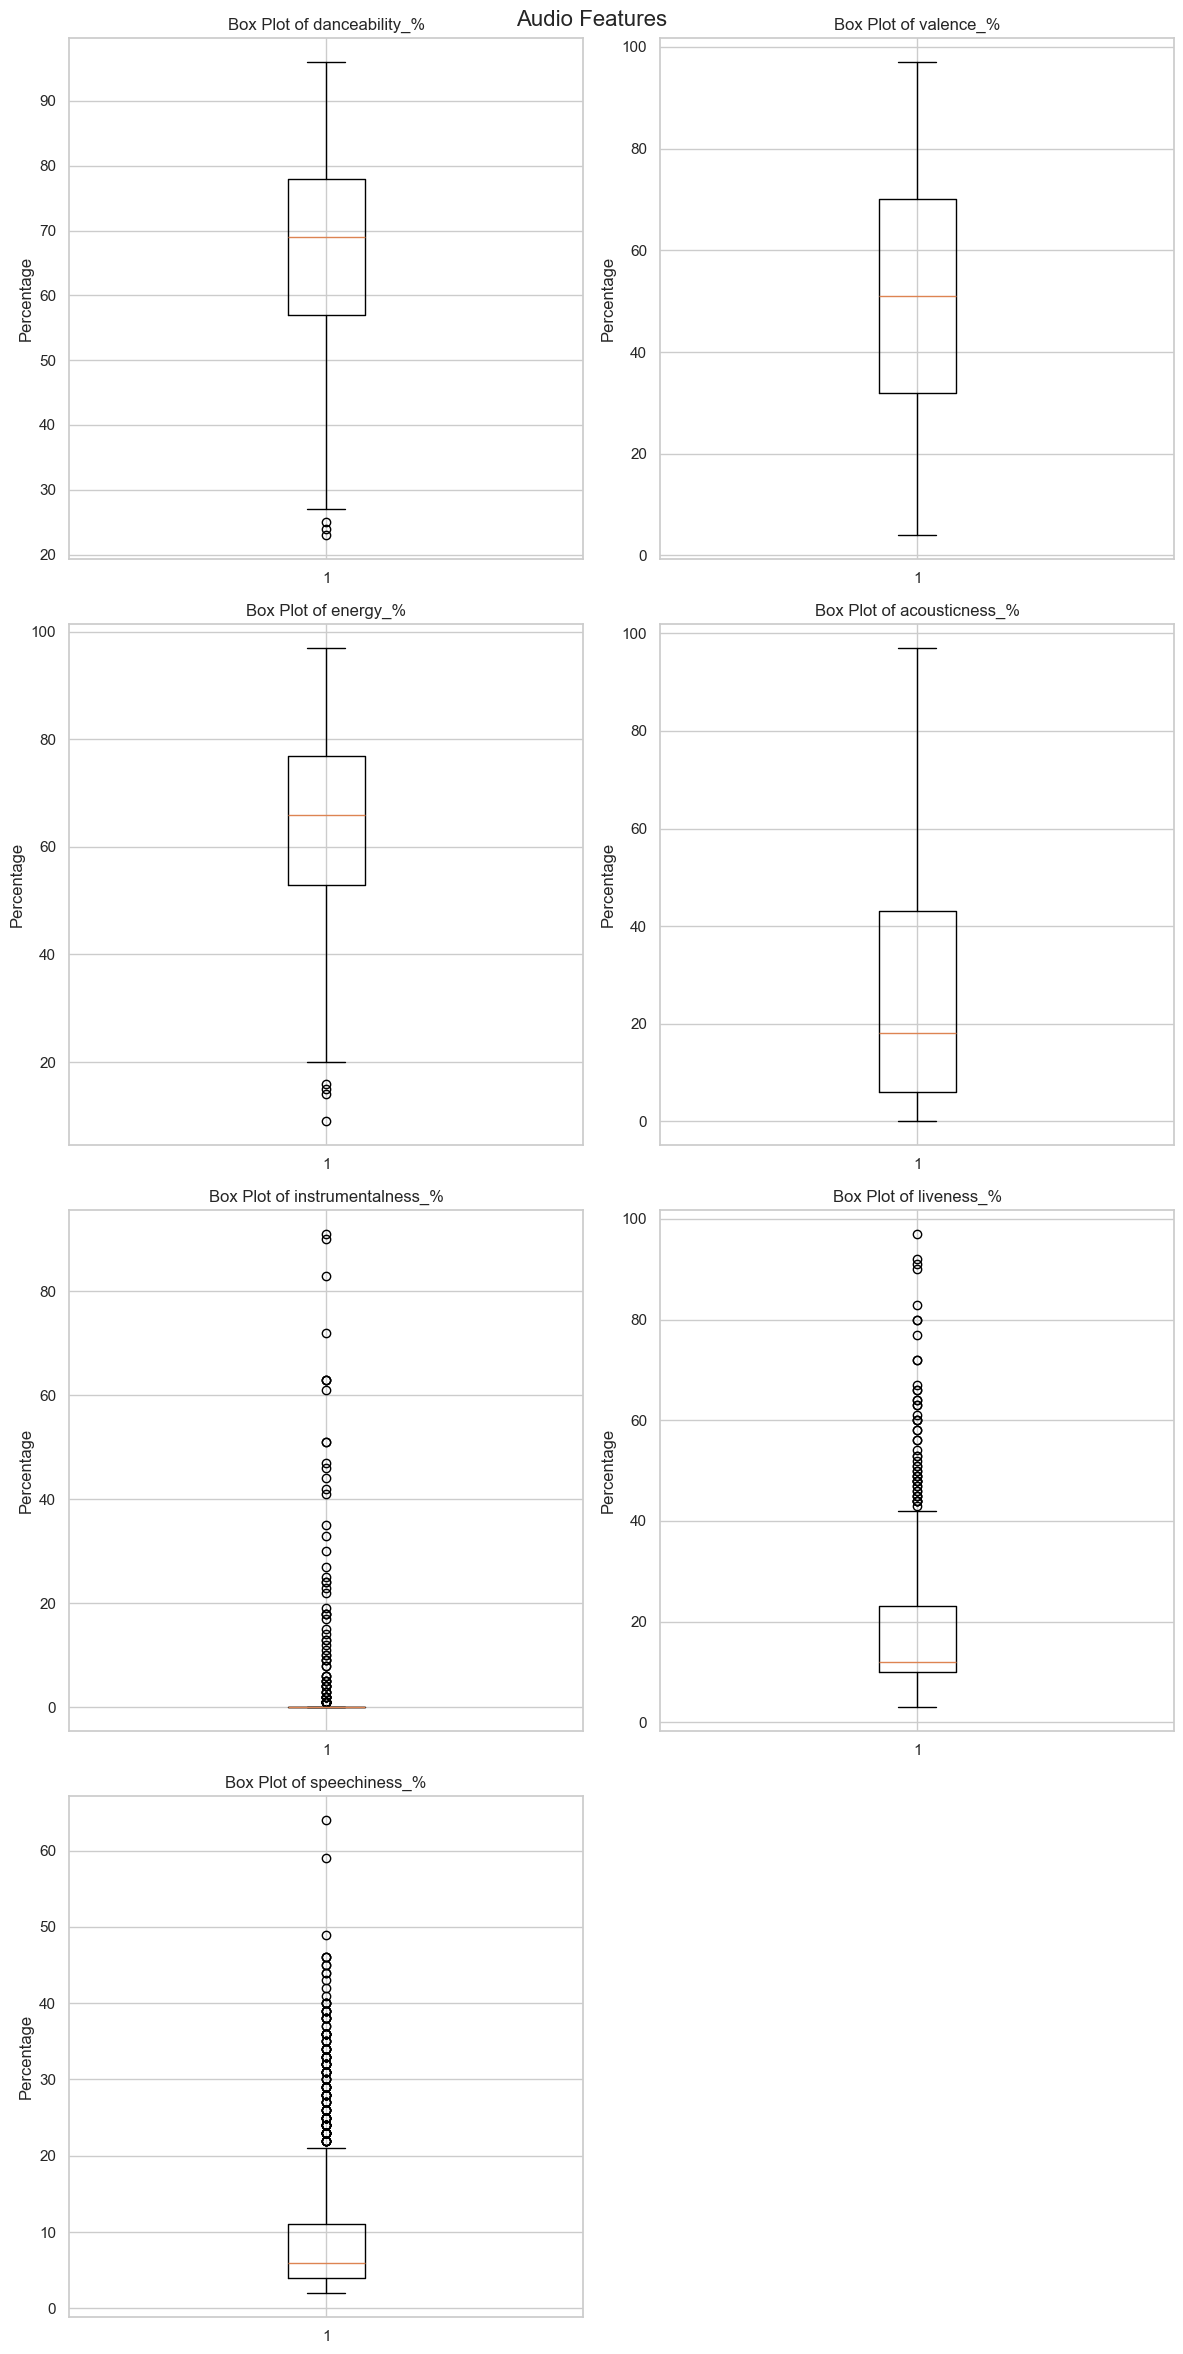

In [223]:
# Plot 1: Playlist presence
plt.figure(figsize=(12, 10))
plt.suptitle('Playlist Presence', fontsize=16)

for i, column in enumerate(['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists'], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 2: Chart presence
plt.figure(figsize=(12, 10))
plt.suptitle('Chart Presence', fontsize=16)

for i, column in enumerate(['in_spotify_charts', 'in_apple_charts', 'in_deezer_charts'], 1):
    plt.subplot(1, 3, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Plot 3: Audio features
plt.figure(figsize=(12, 24))
plt.suptitle('Audio Features', fontsize=16)

audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']

for i, column in enumerate(audio_features, 1):
    plt.subplot(4, 2, i)
    plt.boxplot(out_check[column])
    plt.title(f'Box Plot of {column}')
    plt.ylabel('Percentage')

plt.tight_layout()
plt.show()



Playlist Presence

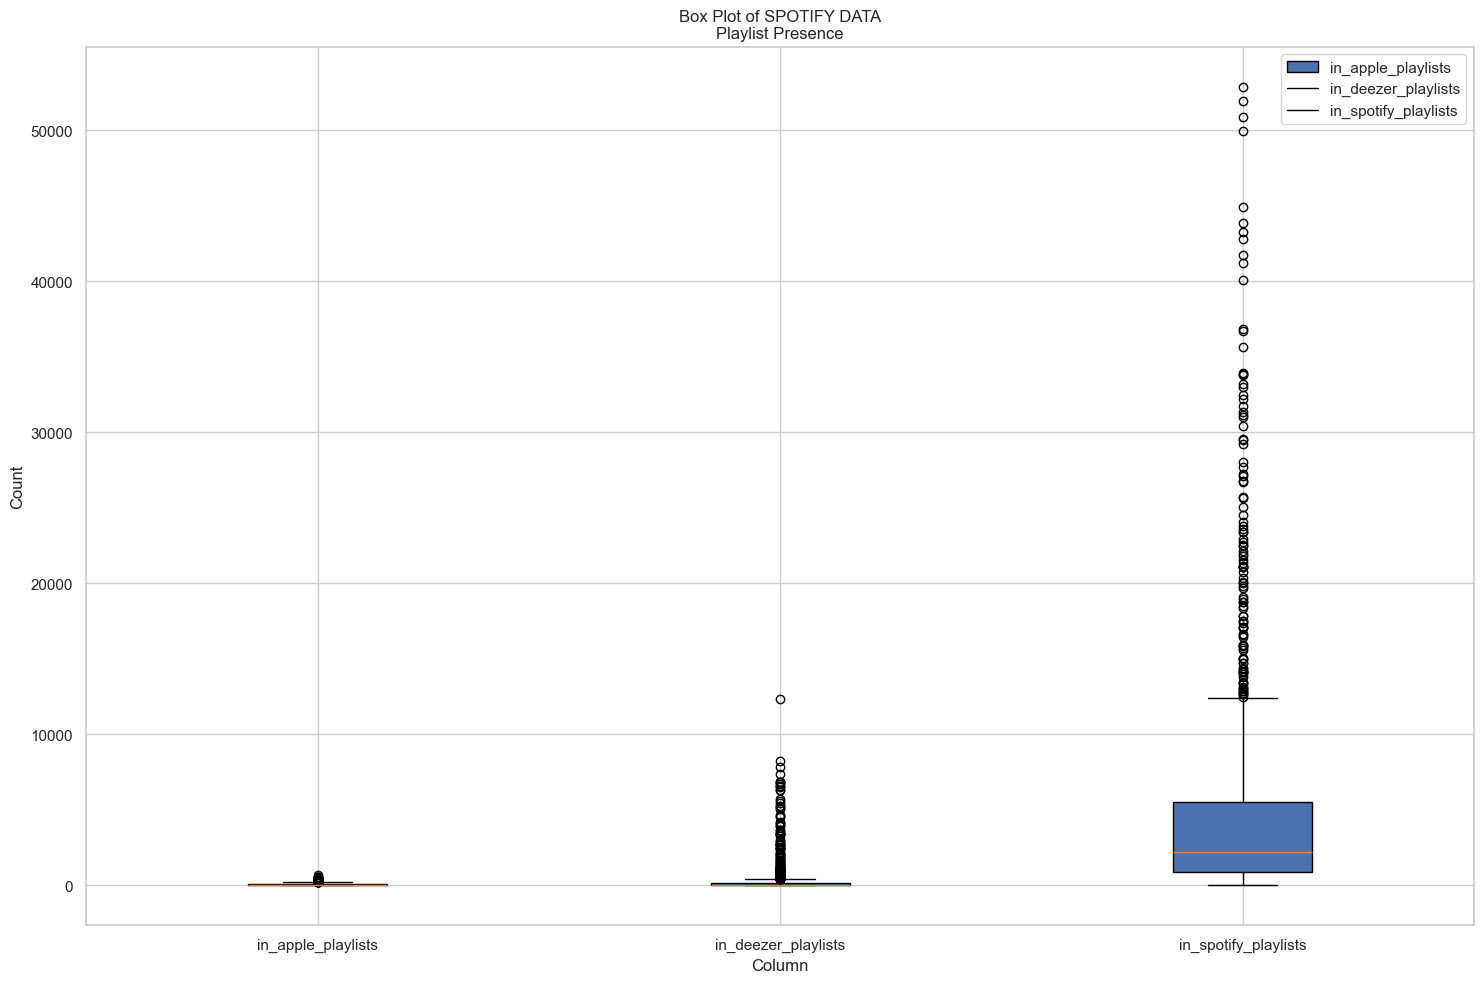

In [224]:
playList=out_check[['in_apple_playlists','in_deezer_playlists','in_spotify_playlists']]
playListColumn=playList.columns

plt.figure(figsize=(15,10))
plt.title('Box Plot of SPOTIFY DATA\nPlaylist Presence')
plt.boxplot(playList,patch_artist=True,labels=playListColumn)
plt.xlabel("Column")
plt.ylabel('Count')
plt.legend(playList)
plt.tight_layout()
plt.show()

Chart Presence

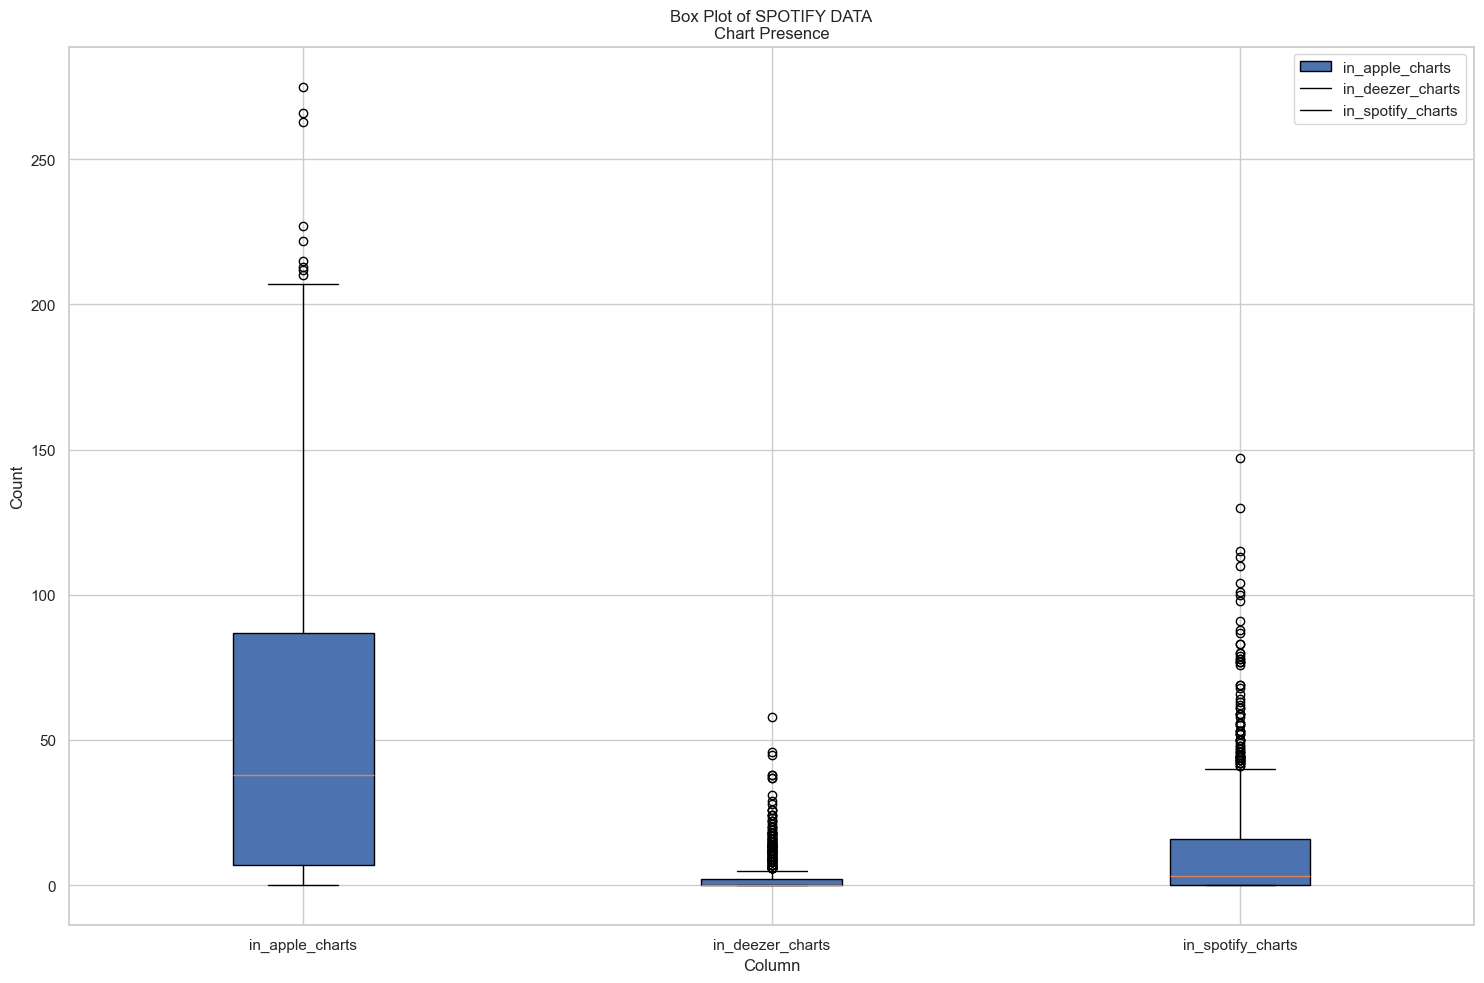

In [225]:
chartData=out_check[['in_apple_charts','in_deezer_charts','in_spotify_charts']]
chartColumn=chartData.columns

plt.figure(figsize=(15,10))
plt.title('Box Plot of SPOTIFY DATA\nChart Presence')
plt.boxplot(chartData,patch_artist=True,labels=chartColumn)
plt.xlabel("Column")
plt.ylabel('Count')
plt.legend(chartData)
plt.tight_layout()
plt.show()

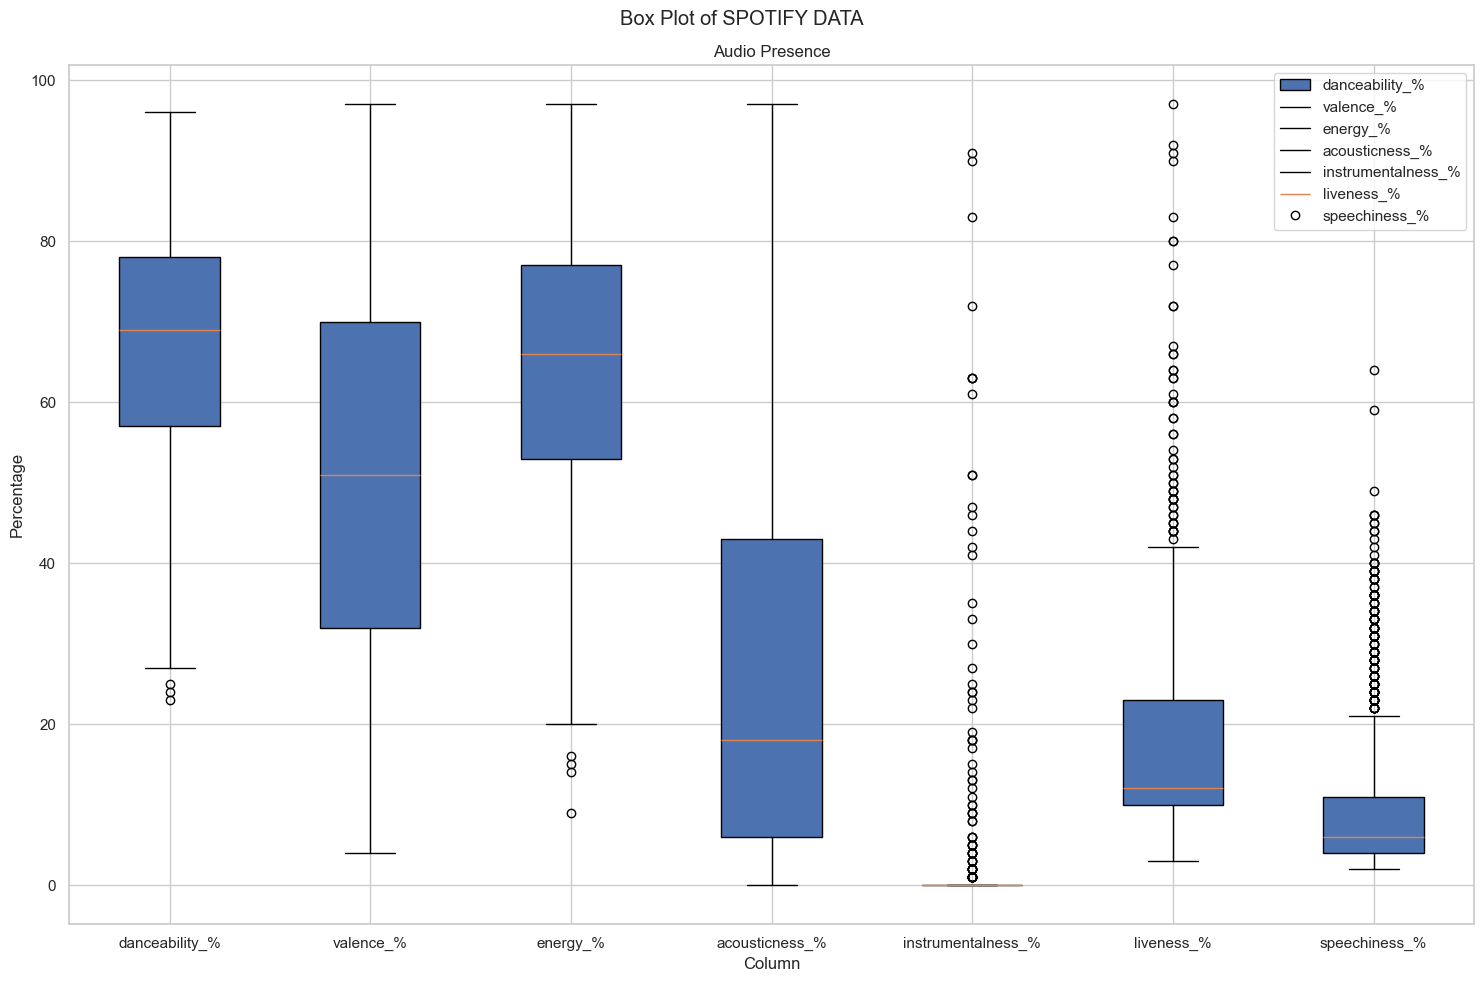

In [226]:
audioData=out_check[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']]
audioColumn=audioData.columns

plt.figure(figsize=(15,10))
plt.suptitle('Box Plot of SPOTIFY DATA')
plt.title('Audio Presence')
plt.boxplot(audioData,patch_artist=True,labels=audioColumn)
plt.xlabel("Column")
plt.ylabel('Percentage')
plt.legend(audioData)
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


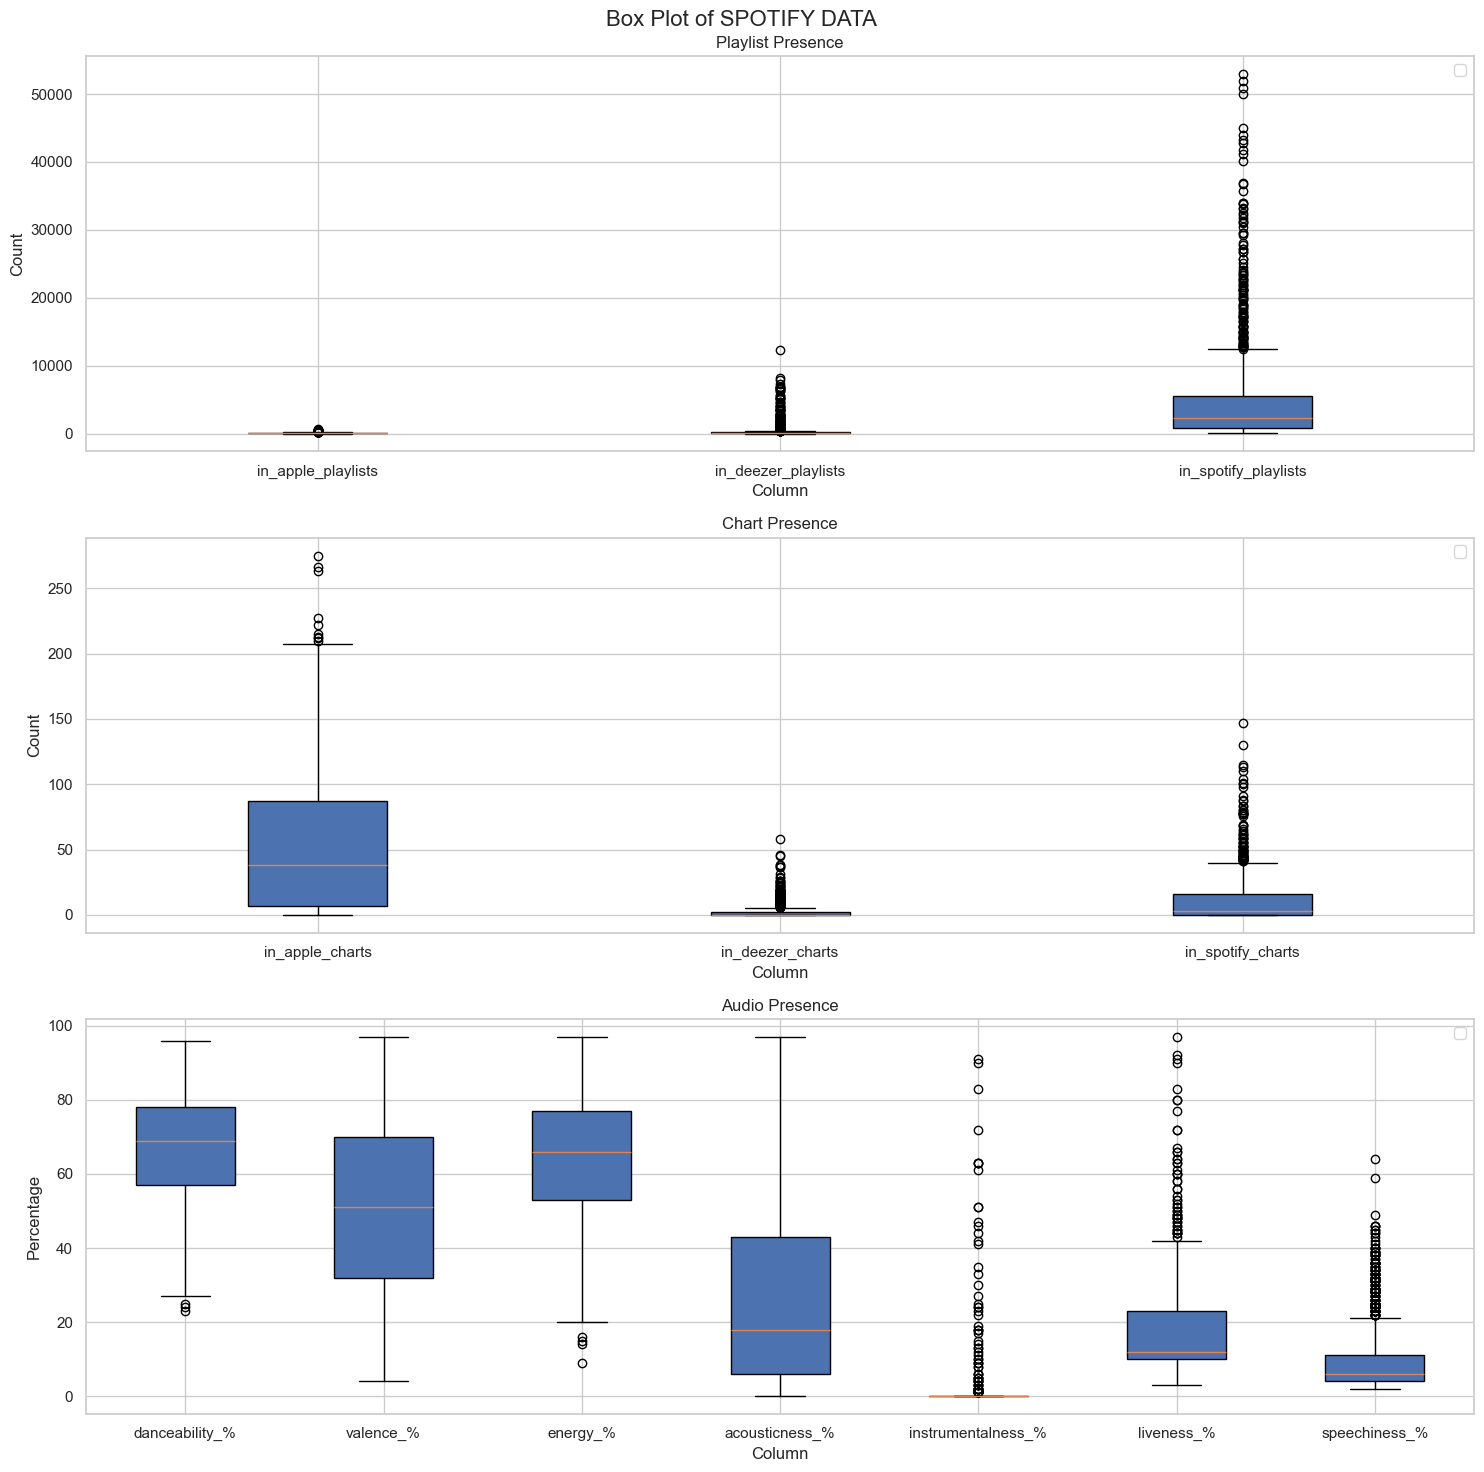

In [227]:
playList = out_check[['in_apple_playlists', 'in_deezer_playlists', 'in_spotify_playlists']]
playListColumn = playList.columns

chartData = out_check[['in_apple_charts', 'in_deezer_charts', 'in_spotify_charts']]
chartColumn = chartData.columns

audioData = out_check[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%',
                   'speechiness_%']]
audioColumn = audioData.columns

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle('Box Plot of SPOTIFY DATA', fontsize=16)

axes[0].boxplot(playList, patch_artist=True, labels=playListColumn)
axes[0].set_title('Playlist Presence')
axes[0].set_xlabel("Column")
axes[0].set_ylabel('Count')
axes[0].legend()

axes[1].boxplot(chartData, patch_artist=True, labels=chartColumn)
axes[1].set_title('Chart Presence')
axes[1].set_xlabel("Column")
axes[1].set_ylabel('Count')
axes[1].legend()

axes[2].boxplot(audioData, patch_artist=True, labels=audioColumn)
axes[2].set_title('Audio Presence')
axes[2].set_xlabel("Column")
axes[2].set_ylabel('Percentage')
axes[2].legend()

plt.tight_layout()
plt.show()


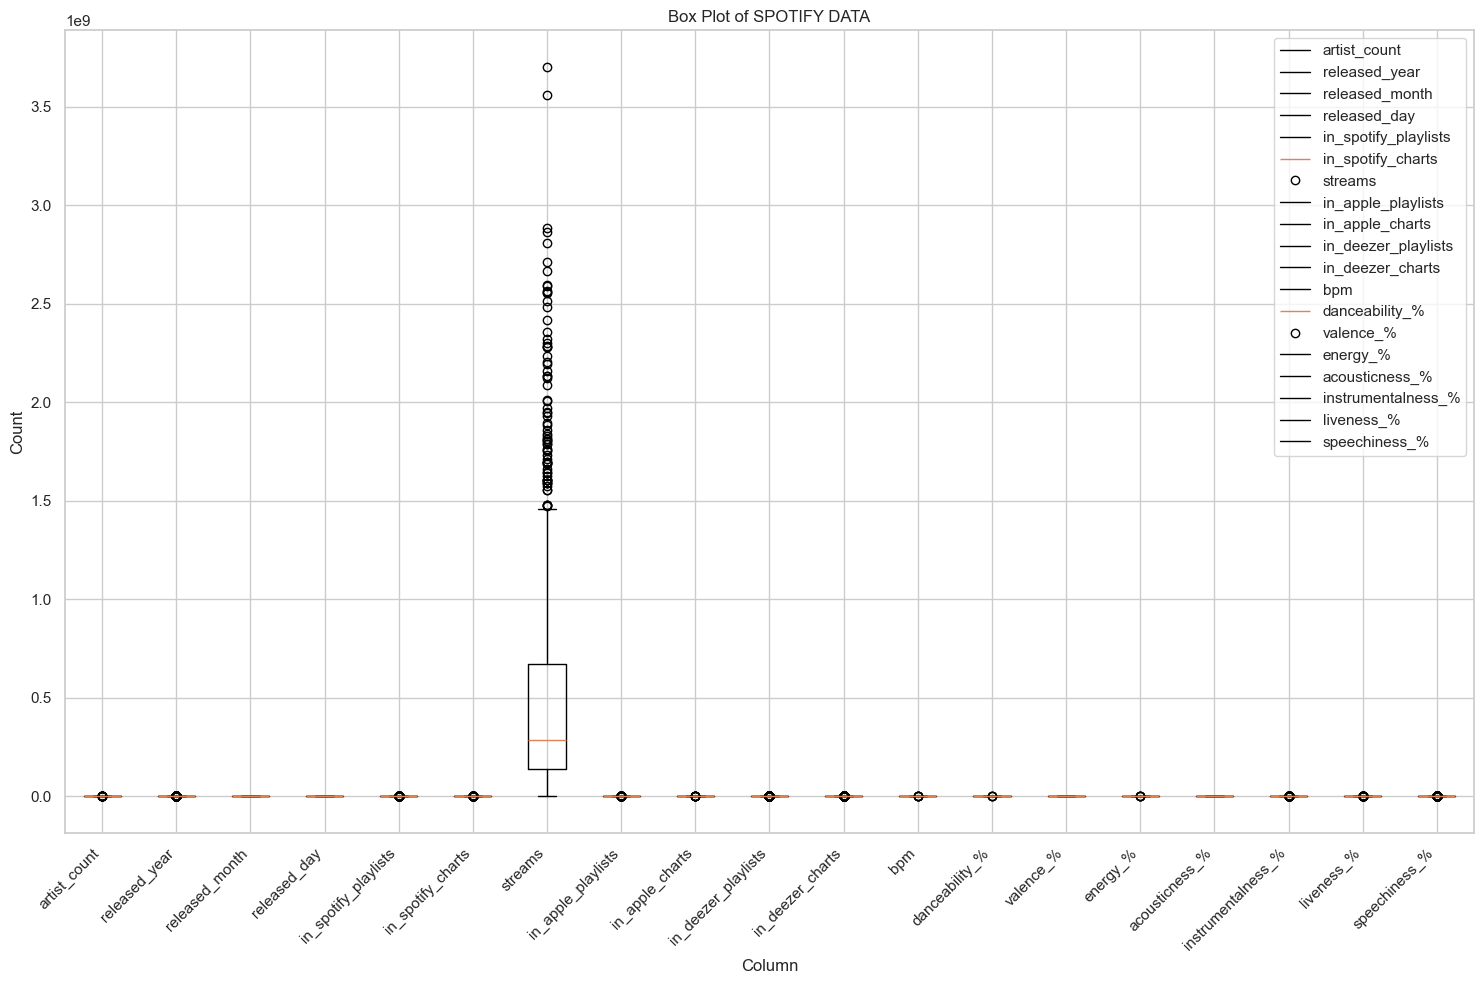

In [228]:
plt.figure(figsize=(15, 10))
plt.title('Box Plot of SPOTIFY DATA')
plt.boxplot(out_check)
plt.legend(out_check)
plt.xlabel("Column")
plt.xticks(range(1, len(columns) + 1), columns, rotation=45, ha="right")
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Query 1: What are the top 10 danceability songs?


In [229]:
top_danceability_songs_2023 = df_copy[df_copy['released_year'] == 2023].nlargest(10, 'danceability_%')
top_danceability_songs_2023

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,11956641,5,...,2,133,Minor,93,68,65,42,0,12,25
266,Shorty Party,"Cartel De Santa, La Kelly",2,2023,3,4,432,12,162887075,8,...,2,96,Major,93,47,47,33,0,10,36
5,Sprinter,"Dave, Central Cee",2,2023,6,1,2186,91,183706234,67,...,17,141,Major,92,66,58,19,0,8,24
52,AMARGURA,Karol G,1,2023,2,24,1133,39,153372011,14,...,10,107,Minor,92,55,70,18,0,15,7
238,"Link Up (Metro Boomin & Don Toliver, Wizkid fe...","WizKid, Toian, Metro Boomin, Don Toliver, Beam",5,2023,6,2,197,0,32761689,3,...,0,101,Major,92,59,51,41,51,26,8
241,Cupido,Tini,1,2023,2,14,1240,24,217672943,51,...,4,120,Major,91,63,58,52,0,31,22
272,Princess Diana (with Nicki Minaj),"Nicki Minaj, Ice Spice",2,2023,4,14,1444,4,104992946,0,...,0,148,Major,90,74,68,14,0,10,19
315,If We Ever Broke Up,Mae Stephens,1,2023,2,10,2040,4,165584767,81,...,9,116,Major,90,96,73,62,0,9,4
205,S-Class,Stray Kids,1,2023,6,2,290,19,65496046,9,...,0,105,Minor,89,67,78,9,0,7,33
18,Classy 101,"Feid, Young Miko",2,2023,3,31,2610,40,335222234,43,...,14,100,Major,86,67,66,14,0,12,16


In [230]:
columns_to_keep = df_copy.columns.difference(['track_name','artists','mode'])
df_selected = df_copy[columns_to_keep]

df_selected.corr()

,acousticness_%,artist_count,bpm,danceability_%,energy_%,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,in_spotify_charts,in_spotify_playlists,instrumentalness_%,liveness_%,released_day,released_month,released_year,speechiness_%,streams,valence_%
acousticness_%,1.000000,-0.103193,-0.015911,-0.235695,-0.577620,-0.078015,-0.060478,-0.028498,-0.063894,-0.056996,-0.064744,0.044123,-0.049196,-0.004957,0.054995,-0.123371,-0.023718,-0.003990,-0.081174
artist_count,-0.103193,1.000000,-0.036736,0.208213,0.137745,-0.089889,-0.050162,-0.002622,-0.072063,-0.020151,-0.102341,-0.049324,0.044247,-0.016583,0.038237,0.088508,0.119070,-0.136074,0.128913
bpm,-0.015911,-0.036736,1.000000,-0.146077,0.026960,0.034593,0.027579,0.031301,-0.034515,0.036597,-0.017687,-0.004560,-0.002846,-0.034405,-0.039978,-0.006323,0.040278,-0.002024,0.041348
danceability_%,-0.235695,0.208213,-0.146077,1.000000,0.197446,-0.026018,-0.029060,0.067629,-0.071591,0.030890,-0.107594,-0.089764,-0.077316,0.049643,-0.047055,0.187230,0.185760,-0.105018,0.407971
energy_%,-0.577620,0.137745,0.026960,0.197446,1.000000,0.104290,0.050444,0.093337,0.064831,0.082488,0.033167,-0.037421,0.117111,0.052085,-0.083352,0.095090,-0.004486,-0.026532,0.357461
in_apple_charts,-0.078015,-0.089889,0.034593,-0.026018,0.104290,1.000000,0.414434,0.385549,0.173120,0.552238,0.270623,-0.010956,-0.016963,0.014108,-0.019106,-0.035249,-0.152243,0.321099,0.048119
in_apple_playlists,-0.060478,-0.050162,0.027579,-0.029060,0.050444,0.414434,1.000000,0.365641,0.473608,0.235488,0.709049,-0.055289,-0.050577,0.029617,0.000567,-0.200248,-0.107590,0.774422,0.055565
in_deezer_charts,-0.028498,-0.002622,0.031301,0.067629,0.093337,0.385549,0.365641,1.000000,0.066967,0.604918,0.143197,0.006890,-0.010917,0.074538,-0.003110,0.095249,-0.080518,0.228759,0.073965
in_deezer_playlists,-0.063894,-0.072063,-0.034515,-0.071591,0.064831,0.173120,0.473608,0.066967,1.000000,0.087954,0.826559,-0.016352,-0.026317,-0.083999,-0.088047,-0.306647,-0.062556,0.598384,-0.013683
in_spotify_charts,-0.056996,-0.020151,0.036597,0.030890,0.082488,0.552238,0.235488,0.604918,0.087954,1.000000,0.164284,-0.009125,-0.046400,0.022953,-0.047569,0.070567,-0.082803,0.246461,0.036355


Find the correlation greater than 0.7

In [231]:
correlation_matrix = df_selected.corr()

high_correlation_matrix = correlation_matrix[(correlation_matrix > 0.7) & (correlation_matrix < 1)]

high_correlations = (correlation_matrix.abs() >= 0.7) & (correlation_matrix.abs() < 1)

indices = [(i, j) for i in range(correlation_matrix.shape[0]) for j in range(correlation_matrix.shape[1]) if high_correlations.iloc[i, j]]

print("Indices of correlations greater than or equal to 0.7 or less than or equal to -0.7:")
print(indices)


Indices of correlations greater than or equal to 0.7 or less than or equal to -0.7:
[(6, 10), (6, 17), (8, 10), (10, 6), (10, 8), (10, 17), (17, 6), (17, 10)]


In [232]:
high_correlation_matrix

,acousticness_%,artist_count,bpm,danceability_%,energy_%,in_apple_charts,in_apple_playlists,in_deezer_charts,in_deezer_playlists,in_spotify_charts,in_spotify_playlists,instrumentalness_%,liveness_%,released_day,released_month,released_year,speechiness_%,streams,valence_%
acousticness_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artist_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bpm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
energy_%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_apple_playlists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.709049,NaN,NaN,NaN,NaN,NaN,NaN,0.774422,NaN
in_deezer_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_deezer_playlists,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.826559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
in_spotify_charts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Number of songs released in a year

In [233]:
# pd.value_counts(df_copy['released_year'])
pd.Series(df_copy['released_year']).value_counts()

released_year
2022    399
2023    175
2021    118
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1970      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
1987      1
Name: count, dtype: int64

Number of songs released in a month

In [234]:
pd.Series(df_copy['released_month']).value_counts()

released_month
1     134
5     128
6      86
3      85
11     80
12     75
10     72
4      65
7      62
2      61
9      56
8      45
Name: count, dtype: int64

Correlation Matrix

([<matplotlib.axis.YTick at 0x2381efc9eb0>,
 [Text(0, 0, 'acousticness_%'),
  Text(0, 1, 'artist_count'),
  Text(0, 2, 'bpm'),
  Text(0, 3, 'danceability_%'),
  Text(0, 4, 'energy_%'),
  Text(0, 5, 'in_apple_charts'),
  Text(0, 6, 'in_apple_playlists'),
  Text(0, 7, 'in_deezer_charts'),
  Text(0, 8, 'in_deezer_playlists'),
  Text(0, 9, 'in_spotify_charts'),
  Text(0, 10, 'in_spotify_playlists'),
  Text(0, 11, 'instrumentalness_%'),
  Text(0, 12, 'liveness_%'),
  Text(0, 13, 'released_day'),
  Text(0, 14, 'released_month'),
  Text(0, 15, 'released_year'),
  Text(0, 16, 'speechiness_%'),
  Text(0, 17, 'streams'),
  Text(0, 18, 'valence_%')])

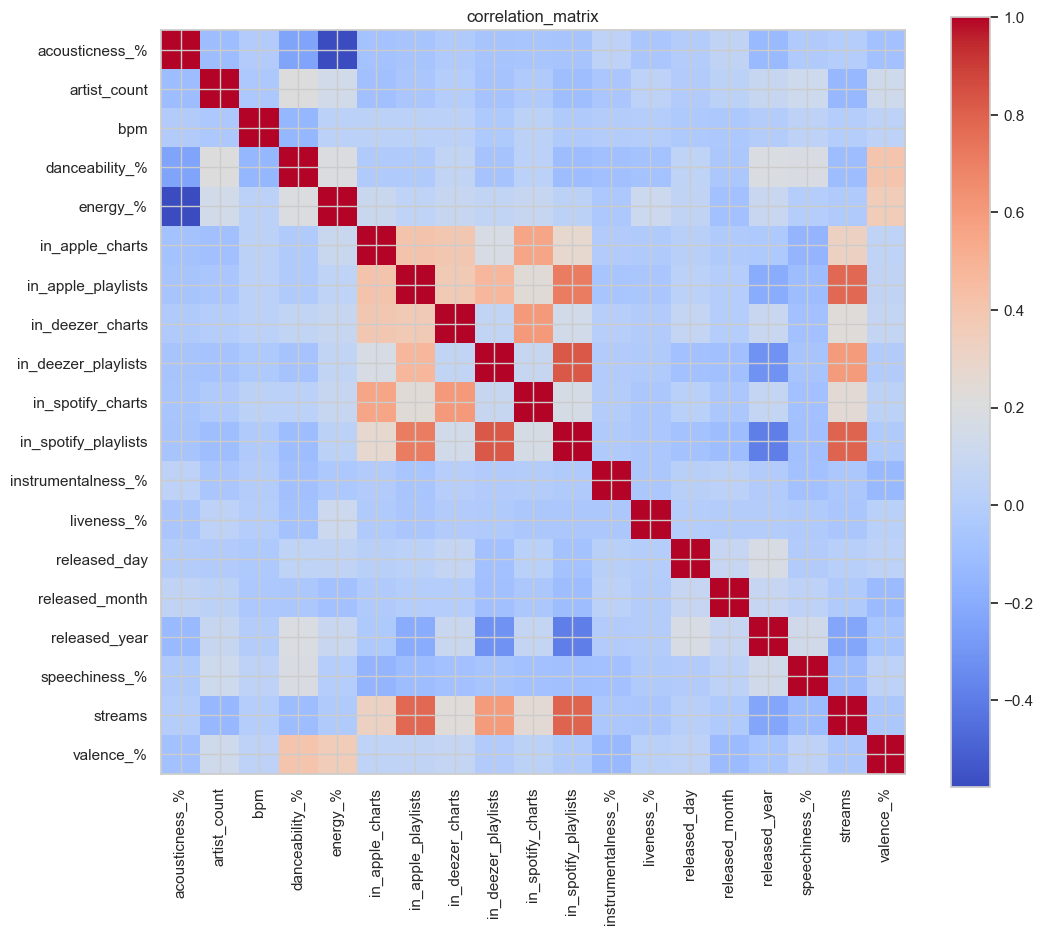

In [235]:
plt.figure(figsize=(12,10))
plt.imshow(correlation_matrix,cmap='coolwarm',interpolation='nearest')
plt.colorbar()
plt.title('correlation_matrix')
plt.xticks(range(len(correlation_matrix)),correlation_matrix,rotation=90)
plt.yticks(range(len(correlation_matrix)),correlation_matrix)

Splitting the track for multiple artist

In [236]:

# Assuming df_copy is your DataFrame
# Split rows with multiple artists into separate rows
df_split_artists = df_copy.assign(artists=df_copy['artists'].str.split(',')).explode('artists')

# If you want to keep the new rows without the original artist count, you can drop the duplicates
df_split_artists = df_split_artists.drop_duplicates(subset=['artists', 'track_name'])

# Now df_split_artists contains a new row for each artist, and you can use it for further analysis
df_split_artists

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
0,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5
947,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5
947,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [237]:
# Assuming df_split_artists is your DataFrame after resetting the index
df_split_artists = df_split_artists.apply(lambda x: x.str.strip() if x.dtype == "O" else x)
df_split_artists.reset_index(drop=True, inplace=True)
df_split_artists.to_csv('artist_split.csv')
df_split_artists


,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),Latto,2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,Seven (feat. Latto) (Explicit Ver.),Jung Kook,2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
2,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
3,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
4,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,A Veces (feat. Feid),Paulo Londra,2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
1473,En La De Ella,Feid,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5
1474,En La De Ella,Sech,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5
1475,En La De Ella,Jhayco,3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


Most Streamed Artists of 2023

In [238]:
artist_streams = df_split_artists.groupby('artists')['streams'].sum()
artist_streams = artist_streams.sort_values(ascending=False)
df_artist_streams = pd.DataFrame(artist_streams)
df_artist_streams

,streams
artists,
Bad Bunny,23813527270
The Weeknd,23497058423
Ed Sheeran,15316587718
Taylor Swift,14630378183
Harry Styles,11608645649
...,...
Toian,32761689
Beam,32761689
DJ 900,11956641


In [239]:
# df_artist_streams = df_artist_streams.reset_index()

# Rename the column from the previous index to 'artist'
#df_artist_streams = df_artist_streams.rename(columns={'artists': 'artist'})
df_artist_streams

,streams
artists,
Bad Bunny,23813527270
The Weeknd,23497058423
Ed Sheeran,15316587718
Taylor Swift,14630378183
Harry Styles,11608645649
...,...
Toian,32761689
Beam,32761689
DJ 900,11956641


<Figure size 1200x800 with 0 Axes>

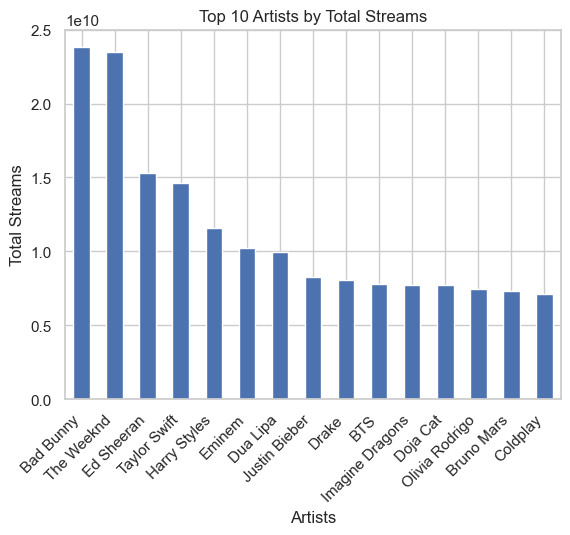

In [245]:
plt.figure(figsize=(12, 8))
df_artist_streams.head(15).plot(kind='bar', legend=False)

# Set x-axis ticks and labels
plt.xticks(rotation=45, ha='right')  # Rotate artist names for better visibility

# Set plot labels and title
plt.xlabel('Artists')
plt.ylabel('Total Streams')
plt.title('Top 10 Artists by Total Streams')

# Show the plot
plt.show()

Artists with the most popular songs

In [241]:
artist_track_counts = df_split_artists['artists'].value_counts()

artist_track_counts = artist_track_counts.reset_index()

df_artist_track_counts = pd.DataFrame(artist_track_counts)
df_artist_track_counts

,artists,count
0,Bad Bunny,40
1,Taylor Swift,38
2,The Weeknd,36
3,Kendrick Lamar,23
4,SZA,23
...,...,...
694,La Joaqui,1
695,Steve Aoki,1
696,FIFA Sound,1
697,Beach House,1


Artists present in most playlists

In [242]:
# Group by 'artists' and calculate the sum of specified columns for each artist
artist_playlists = df_split_artists.groupby('artists')[['in_spotify_playlists', 'in_apple_playlists', 'in_deezer_playlists']].sum()

# Sort the result by the sum of playlists in descending order
artist_playlists = artist_playlists.sum(axis=1).sort_values(ascending=False)

# Convert the result to a DataFrame
df_artist_playlists = pd.DataFrame({'Total_Playlists': artist_playlists})

# Display the result
df_artist_playlists.reset_index()

,artists,Total_Playlists
0,The Weeknd,241666
1,Eminem,180355
2,Ed Sheeran,162567
3,Taylor Swift,142855
4,Bad Bunny,142461
...,...,...
694,Sukriti Kakar,153
695,Mahalini,138
696,Colde,115
697,Shubh,74


In [243]:
df_artist_streams

,streams
artists,
Bad Bunny,23813527270
The Weeknd,23497058423
Ed Sheeran,15316587718
Taylor Swift,14630378183
Harry Styles,11608645649
...,...
Toian,32761689
Beam,32761689
DJ 900,11956641


Average attributes of top 15 artists

In [244]:
top_artists = list(df_artist_streams.nlargest(15, 'streams')['artists'])
top_artists

KeyError: 'artists'

In [ ]:
artists_data = df_split_artists[df_split_artists['artists'].isin(top_artists)].copy()
artists_data['artists'] = pd.Categorical(artists_data['artists'], categories=top_artists, ordered=True)
average_attributes = artists_data.groupby('artists')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()
average_attributes.sort_index()


C:\Users\Aasim\AppData\Local\Temp\ipykernel_17396\2272653464.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_attributes = artists_data.groupby('artists')[['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']].mean()


,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
artists,,,,,,,
Bad Bunny,74.425000,50.700000,69.125000,23.725000,1.575000,19.550000,11.275000
The Weeknd,59.805556,43.388889,63.444444,20.694444,1.000000,20.888889,8.166667
Ed Sheeran,71.428571,55.642857,63.142857,32.571429,0.000000,17.500000,5.142857
Taylor Swift,59.973684,34.157895,55.157895,31.473684,0.605263,16.657895,7.026316
Harry Styles,61.352941,54.000000,58.882353,42.823529,1.588235,14.294118,5.352941
Eminem,79.666667,47.222222,74.111111,6.444444,0.000000,22.555556,16.444444
Dua Lipa,75.666667,74.222222,80.333333,6.111111,0.000000,15.666667,9.000000
Justin Bieber,68.142857,57.857143,63.285714,31.285714,0.000000,21.571429,12.714286
Drake,73.684211,30.526316,54.684211,5.526316,0.105263,23.105263,19.947368


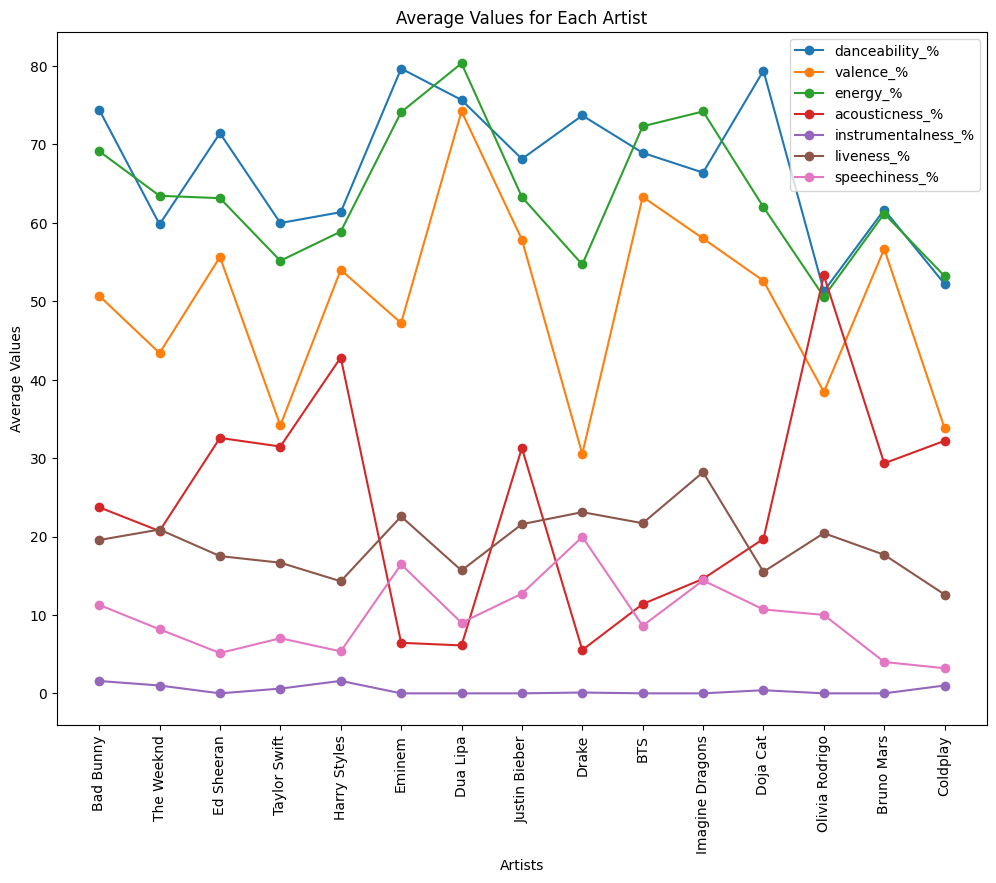

In [ ]:
average_attributes.plot(kind='line', marker='o', figsize=(12, 9))

# Set plot labels and title
plt.xlabel('Artists')
plt.ylabel('Average Values')
plt.title('Average Values for Each Artist')
plt.xticks(rotation = 90)
plt.xticks(range(len(average_attributes.index)), average_attributes.index)

# Show the plot
plt.show()

In [ ]:
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


In [ ]:
df_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            949 non-null    object
 1   artists               949 non-null    object
 2   artist_count          949 non-null    int64 
 3   released_year         949 non-null    int64 
 4   released_month        949 non-null    int64 
 5   released_day          949 non-null    int64 
 6   in_spotify_playlists  949 non-null    int64 
 7   in_spotify_charts     949 non-null    int64 
 8   streams               949 non-null    int64 
 9   in_apple_playlists    949 non-null    int64 
 10  in_apple_charts       949 non-null    int64 
 11  in_deezer_playlists   949 non-null    int64 
 12  in_deezer_charts      949 non-null    int64 
 13  bpm                   949 non-null    int64 
 14  mode                  949 non-null    object
 15  danceability_%        949 non-null    in

In [ ]:
df_org

,track_name,artists,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,in_deezer_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,10,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,14,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,14,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,12,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,15,144,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,1,144,Major,60,24,39,57,0,8,3
945,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,0,166,Major,42,7,24,83,1,12,6
946,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,0,92,Major,80,81,67,4,0,8,6
947,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,0,97,Major,82,67,77,8,0,12,5


Density Distribution of Release Date

In [ ]:
df_with_datetime = df_org.copy()

df_with_datetime['release_date'] = pd.to_datetime(df_with_datetime[['released_year', 'released_month', 'released_day']].astype(str).agg('-'.join, axis=1), errors='coerce')

df_with_datetime[['track_name','release_date']]

,track_name,release_date
0,Seven (feat. Latto) (Explicit Ver.),2023-07-14
1,LALA,2023-03-23
2,vampire,2023-06-30
3,Cruel Summer,2019-08-23
4,WHERE SHE GOES,2023-05-18
...,...,...
944,My Mind & Me,2022-11-03
945,Bigger Than The Whole Sky,2022-10-21
946,A Veces (feat. Feid),2022-11-03
947,En La De Ella,2022-10-20


In [ ]:
min_release_date = df_with_datetime['release_date'].min()
print("Smallest Release Date:", min_release_date)


Smallest Release Date: 1930-01-01 00:00:00


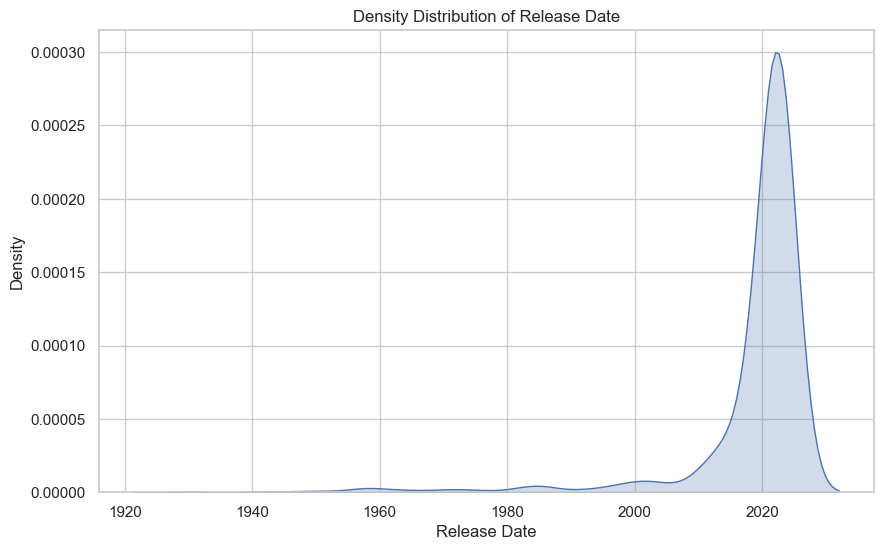

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.kdeplot(df_with_datetime['release_date'], fill=True)

plt.xlabel('Release Date')
plt.ylabel('Density')
plt.title('Density Distribution of Release Date')


plt.show()

In [ ]:
df_with_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            949 non-null    object        
 1   artists               949 non-null    object        
 2   artist_count          949 non-null    int64         
 3   released_year         949 non-null    int64         
 4   released_month        949 non-null    int64         
 5   released_day          949 non-null    int64         
 6   in_spotify_playlists  949 non-null    int64         
 7   in_spotify_charts     949 non-null    int64         
 8   streams               949 non-null    int64         
 9   in_apple_playlists    949 non-null    int64         
 10  in_apple_charts       949 non-null    int64         
 11  in_deezer_playlists   949 non-null    int64         
 12  in_deezer_charts      949 non-null    int64         
 13  bpm                 